# Свертка

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

def sobel_filter(img, k_size, mode='vertical'):

    img_filtered = img.astype(float)

    # получаем размеры входной картинки
    width, height, c = img.shape

    # если картинка цветная (т.е. количество цветовых каналов > 1),
    # делаем ее черно-белой (с одним цветовым каналом)
    if c > 1:
        img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]

    # убеждаемся, что параметр размера фильтра k_size равен либо 3, либо 5
    # наша функция умеет сворачивать картинку фильтром Собеля только таких размеров
    assert(k_size == 3 or k_size == 5);

    # если фильтр размера 3
    if k_size == 3:
        # горизонтальный и вертикальный фильтры
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = float)
    # если фильтр размера 5
    else:
        # горизонтальный и вертикальный фильтры
        kh = np.array([[-1, -2, 0, 2, 1],
                   [-4, -8, 0, 8, 4],
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = float)
        kv = np.array([[1, 4, 6, 4, 1],
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0],
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = float)

    # свертка вертикальным фильтром Собеля
    if mode == 'vertical':
        gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
        g = np.sqrt(gx * gx)
    elif mode == "horizontal":
        gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
        g = np.sqrt(gy * gy)
    else:
        raise ValueError('unknown mode')

    # нормализуем картинку
    g *= 255.0 / np.max(g)

    return g

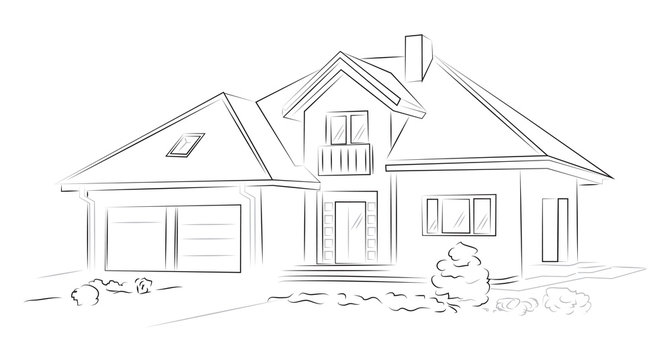

In [ ]:
img = Image.open('house_scetch.jpg')
img

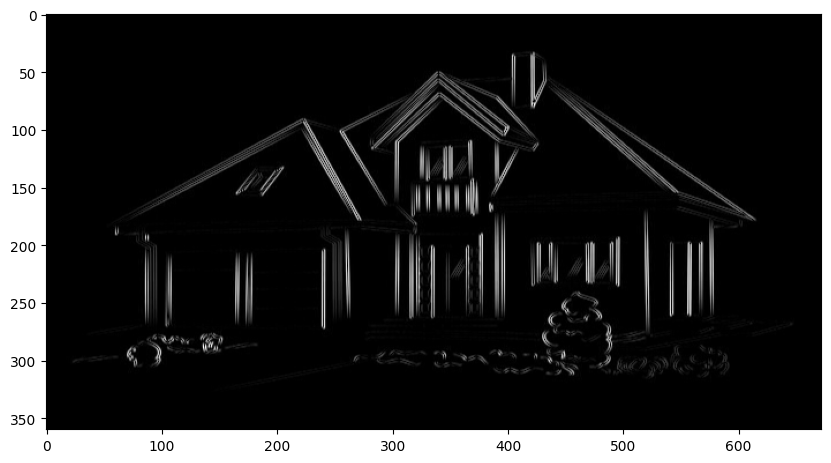

In [ ]:
img_filtered = sobel_filter(np.array(img), 3, mode='vertical')

plt.figure(figsize=(10, 8))
plt.imshow(img_filtered, cmap='gray')

# Загрузка модели из torchvision

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

Архитектуры, доступные в torchvision, можно найти тут

https://pytorch.org/vision/0.8/models.html

In [ ]:
# модель resnet-18
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet_transforms = transforms.Compose([
        transforms.Resize(256), # размер каждой картинки будет приведен к 256*256
        transforms.CenterCrop(224), # у картинки будет вырезан центральный кусок размера 224*224
        transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # значения пикселей картинки нормализуются
    ])

# можно самому не писать преобразования, а просто взять их из models:
# resnet_transforms = models.ResNet18_Weights.IMAGENET1K_V1.transforms()

In [ ]:
! wget "https://ichef.bbci.co.uk/news/640/cpsprodpb/475B/production/_98776281_gettyimages-521697453.jpg" -O "doggie.jpg"

--2024-05-02 13:31:27--  https://ichef.bbci.co.uk/news/640/cpsprodpb/475B/production/_98776281_gettyimages-521697453.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.37.96.113, 2600:1406:6c00:19b::f33, 2600:1406:6c00:19c::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.37.96.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23424 (23K) [image/jpeg]
Saving to: ‘doggie.jpg’

doggie.jpg          100%[===================>]  22.88K  --.-KB/s    in 0.04s   

2024-05-02 13:31:27 (554 KB/s) - ‘doggie.jpg’ saved [23424/23424]



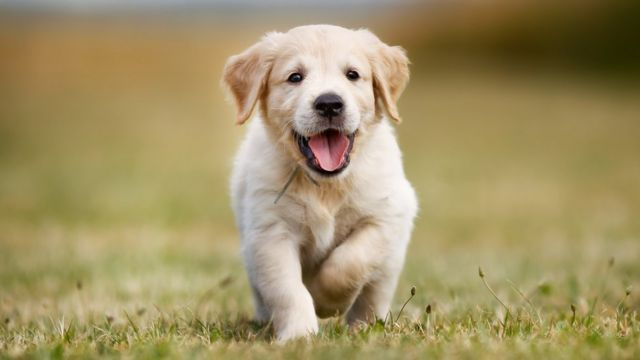

In [ ]:
from PIL import Image

image = Image.open('doggie.jpg')
image

In [ ]:
image_transformed = resnet_transforms(image)
print(image_transformed.shape)

torch.Size([3, 224, 224])


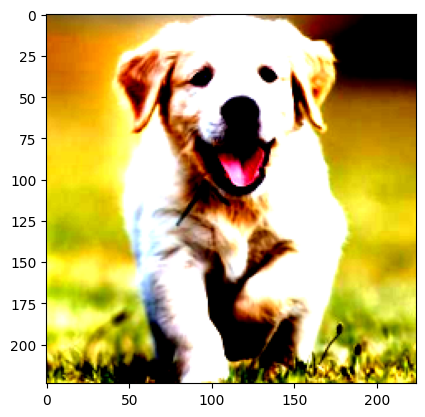

In [ ]:
plt.imshow(image_transformed.permute(1,2,0).data.cpu().numpy())

In [ ]:
model.eval()

with torch.no_grad():
    # image_transformed -> [image_transformed]
    model_output = model(image_transformed.reshape((1, 3, 224, 224)))

model_output

tensor([[ 7.7923e-01, -6.5713e-01, -2.0355e+00, -5.2771e+00, -1.6973e+00,
         -2.8970e-01, -2.7641e+00, -1.9297e+00, -5.7047e-01, -3.0571e+00,
         -2.2652e+00, -1.9824e+00, -1.5387e+00, -4.1534e+00, -8.4872e-01,
         -4.5245e+00, -4.1303e+00, -3.0133e+00, -4.0182e+00, -5.2528e+00,
         -2.1531e+00, -8.5778e-01, -1.3138e+00,  1.0639e-01,  1.4036e-01,
          2.6826e-01, -4.2953e-01, -6.8401e-01, -2.4271e-01, -1.9418e+00,
         -2.4971e+00, -3.3424e+00, -1.6081e+00, -1.0295e+00,  7.2670e-01,
          7.7685e-01,  1.1581e+00, -1.3271e+00, -1.7540e+00, -1.4787e+00,
         -1.4925e+00, -7.6697e-02, -8.1115e-01, -2.2953e+00, -3.3856e-02,
         -6.6323e-01, -1.0589e+00,  4.3270e-01, -9.9236e-01, -2.7333e+00,
         -1.1264e+00,  1.8996e-02,  2.0581e-01, -3.5283e-01, -2.3014e+00,
         -1.8041e+00, -4.0221e-01, -2.0437e+00, -1.6803e+00, -2.1154e+00,
         -1.7406e-01, -1.1477e+00, -2.0555e+00,  2.9124e-01,  5.4842e-01,
         -2.9602e+00, -1.9082e+00, -1.

In [ ]:
np.argmax(model_output.data.cpu().numpy())

207

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

# Дообучение

In [ ]:
# эта ячейка скачивает zip архив с данными
! wget "https://www.dropbox.com/s/r11z0ugf2mezxvi/dogs.zip?dl=0" -O dogs.zip

--2024-05-02 13:31:28--  https://www.dropbox.com/s/r11z0ugf2mezxvi/dogs.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/r11z0ugf2mezxvi/dogs.zip [following]
--2024-05-02 13:31:29--  https://www.dropbox.com/s/raw/r11z0ugf2mezxvi/dogs.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e37eeec436ea120f57070ab88.dl.dropboxusercontent.com/cd/0/inline/CSJn8LTmyGFYF--VpIysK3p3iqaxYlylxhQBoaWaCBHWNb7NiVq9GR0DFJ8ohQqljmPvrsOTbDBM9GvsDSAXS9ikVfvYt4PA2oMuctCebzVIkIj8DPnf310v_mpQwtKW3HBcrsdYwKIS7P2TYWnprs5-/file# [following]
--2024-05-02 13:31:29--  https://uc1e37eeec436ea120f57070ab88.dl.dropboxusercontent.com/cd/0/inline/CSJn8LTmyGFYF--VpIysK3p3iqaxYlylxhQBoaWaCBHWNb7NiVq9GR0DFJ8ohQqljmPvrsOTbDBM9GvsDSAXS9ikVfvYt4PA2oMuctCebzV

In [ ]:
# эта ячейка распаковывает архив. В колабе появится папка ./dogs с данными.
! unzip -qq dogs.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

In [ ]:
resnet_transforms = transforms.Compose([
        transforms.Resize(256), # размер каждой картинки будет приведен к 256*256
        transforms.CenterCrop(224), # у картинки будет вырезан центральный кусок размера 224*224
        transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # значения пикселей картинки нормализуются
    ])

In [ ]:
train_data = datasets.ImageFolder('./dogs/train', transform=resnet_transforms)
val_data = datasets.ImageFolder('./dogs/valid', transform=resnet_transforms)
test_data = datasets.ImageFolder('./dogs/test', transform=resnet_transforms)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
model = models.resnet18(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

Заменим последний слой сети на новый, содержащий 70 нейронов (так как у нас 70 классов в датасете)

In [ ]:
model.fc = nn.Linear(512, 70)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
list(model.children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
#Заморозим все сверточные слои

for i, layer in enumerate(model.children()):
  if i < 9:
    for param in layer.parameters():
      param.requires_grad = False

In [ ]:
def create_model(model, num_freeze_layers, num_out_classes):
    # замена последнего слоя сети
    model.fc = nn.Linear(512, num_out_classes)

    # заморозка слоев
    for i, layer in enumerate(model.children()):
        if i < num_freeze_layers:
            for param in layer.parameters():
                param.requires_grad = False
    return model

In [ ]:
model = create_model(models.resnet18(pretrained=True), 9, 70)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
def evaluate(model, dataloader, loss_fn):

    losses = []

    num_correct = 0
    num_elements = 0

    for i, batch in enumerate(dataloader):

        # так получаем текущий батч
        X_batch, y_batch = batch
        num_elements += len(y_batch)

        with torch.no_grad():
            logits = model(X_batch.to(device))

            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1)

            num_correct += torch.sum(y_pred.cpu() == y_batch)

    accuracy = num_correct / num_elements

    return accuracy.numpy(), np.mean(losses)

def train(model, loss_fn, optimizer, n_epoch=3):

    # цикл обучения сети
    for epoch in range(n_epoch):

        print("Epoch:", epoch+1)

        model.train(True)

        running_losses = []
        running_accuracies = []
        for i, batch in enumerate(train_loader):
            # так получаем текущий батч
            X_batch, y_batch = batch

            # forward pass (получение ответов на батч картинок)
            logits = model(X_batch.to(device))

            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            loss = loss_fn(logits, y_batch.to(device))
            running_losses.append(loss.item())

            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети
            optimizer.zero_grad() # обнуляем веса

            # вычислим accuracy на текущем train батче
            model_answers = torch.argmax(logits, dim=1)
            train_accuracy = torch.sum(y_batch == model_answers.cpu()) / len(y_batch)
            running_accuracies.append(train_accuracy)

            # Логирование результатов
            if (i+1) % 100 == 0:
                print("Средние train лосс и accuracy на последних 50 итерациях:",
                      np.mean(running_losses), np.mean(running_accuracies), end='\n')

        # после каждой эпохи получаем метрику качества на валидационной выборке
        model.train(False)

        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn=loss_fn)
        print("Эпоха {}/{}: val лосс и accuracy:".format(epoch+1, n_epoch,),
                      val_loss, val_accuracy, end='\n')

    return model

In [ ]:
# снова объявим модель
model = create_model(models.resnet18(pretrained=True), 9, 70)

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate.
# вы можете экспериментировать с разными значениями learning_rate
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# запустим обучение модели
# параметр n_epoch можно варьировать
model = train(model, loss_fn, optimizer, n_epoch=3)

Epoch: 1
Средние train лосс и accuracy на последних 50 итерациях: 2.3421742475032805 0.5126563
Эпоха 1/3: val лосс и accuracy: 0.9645366072654724 0.8542857
Epoch: 2
Средние train лосс и accuracy на последних 50 итерациях: 0.7898471546173096 0.84296876
Эпоха 2/3: val лосс и accuracy: 0.6866380707784132 0.8842857
Epoch: 3
Средние train лосс и accuracy на последних 50 итерациях: 0.5583642521500587 0.87609375
Эпоха 3/3: val лосс и accuracy: 0.630569651722908 0.89285713


In [ ]:
test_accuracy, _ = evaluate(model, test_loader, loss_fn)
print('Accuracy на тесте', test_accuracy)

Accuracy на тесте 0.93


# Сегментация

In [ ]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.com/d/3hvHKFeex6j42Q) -o PH2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  203M  100  203M    0     0  13.7M      0  0:00:14  0:00:14 --:--:-- 17.5M


In [ ]:
! unzip -qq PH2.zip

replace __MACOSX/._PH2 Dataset images? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import functional as F
from torchvision import transforms

In [ ]:
# библиотека для удобной работы с файлами на диске
import os
# библиотека для считывания картинок
from PIL import Image

# в эти массивы будем сохранять RGB картинки
# и их соответствующие карты сегментации
images = []
lesions = []

# название папки, в которой лежат данные
root = 'PH2 Dataset images'

# проходимся по всем подпапкам и файлам внутри директории root
for dirname, _, files in os.walk(root):
    # если название папки заканчивается на _Dermoscopic_Image,
    # то в ней лежит RGB картинка
    if dirname.endswith('_Dermoscopic_Image'):
        images.append(Image.open(os.path.join(dirname, files[0])))
    # если название папки заканчивается на _lesion,
    # то в ней лежит карта сегментации
    if dirname.endswith('_lesion'):
        lesions.append(Image.open(os.path.join(dirname, files[0])))
print(images)
print(lesions)

[<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=764x576 at 0x7CDEDEE14D60>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x575 at 0x7CDEDEE161D0>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=765x573 at 0x7CDE117DCA60>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DE7D0>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=764x575 at 0x7CDE117DCF40>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DE680>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DFCA0>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DCC10>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=764x575 at 0x7CDE117DE0B0>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DF640>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=766x576 at 0x7CDE117DF6D0>, <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=767x576 at 0x7CDE117DE290>, <PIL.BmpImagePlugin.BmpImag

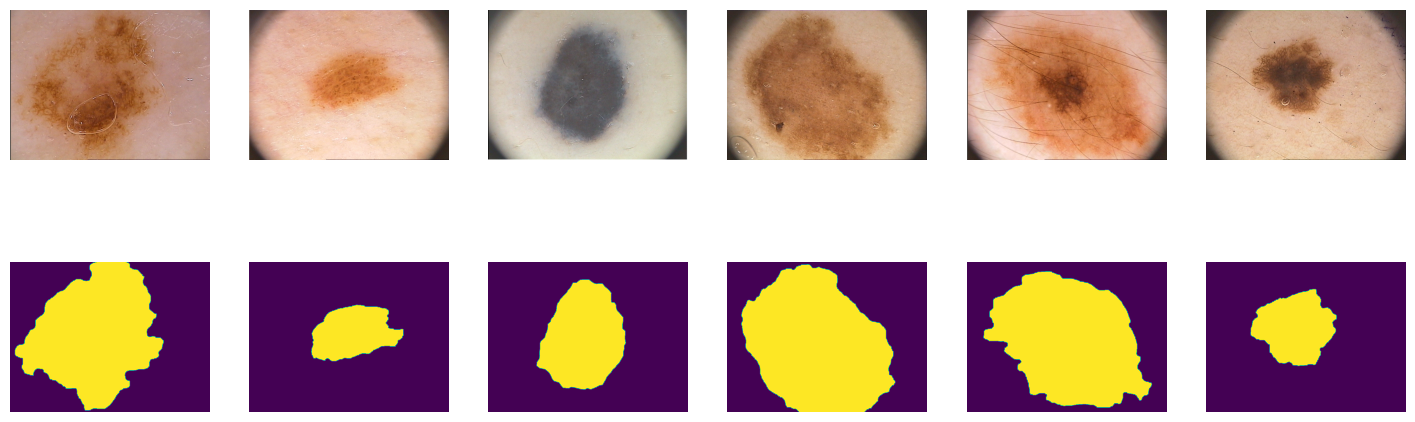

In [ ]:
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(np.array(images[i]))

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(np.array(lesions[i]))
plt.show();

In [ ]:
class PH2(Dataset):
    def __init__(self, images, lesions):

        self.images = images
        self.lesions = lesions

        self.img_transforms = transforms.Compose([
            transforms.Resize((256, 256)), # размер каждой картинки будет приведен к 256*256
            transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # значения пикселей картинки нормализуются
        ])

        self.seg_transforms = transforms.Compose([
            transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST), # размер каждой картинки будет приведен к 256*256
            transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        ])

    def __getitem__(self, index):
        '''
        этот метод должен по заданному номеру пары картинка-сегментация (index)
        возвращать эту пару. Этот метод обязательно нужно реализовывать во всех
        кастомных классах Dataset. Перед тем, как выдать на выходе
        пару картинка-сегментация, можно применить к картинкам любые преобразования.
        '''

        # находим по индексу нужные картинку и ее карту сегментации
        img = self.images[index]
        mask = self.lesions[index]

        # # применяем предобработку к RGB картинке
        img = self.img_transforms(img)
        # # применяем предобработку к маске сегментации
        mask = self.seg_transforms(mask)

        # возвращаем пару: картинка — ее маска сегментации
        return (img, mask)

    def __len__(self):
        '''
        этот метод должен возвращать количество пар картинка-сегментация в датасете
        '''
        return len(self.images)

In [ ]:
data = PH2(images, lesions)

In [ ]:
train_size = 100
val_size = 50
test_size = 50

train_data, val_data, test_data = torch.utils.data.random_split(data, [train_size, val_size, test_size])

In [ ]:
batch_size = 16
train_loader = DataLoader(train_data,
                     batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data,
                      batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data,
                     batch_size=batch_size, shuffle=False)

Архитектура сети SegNet

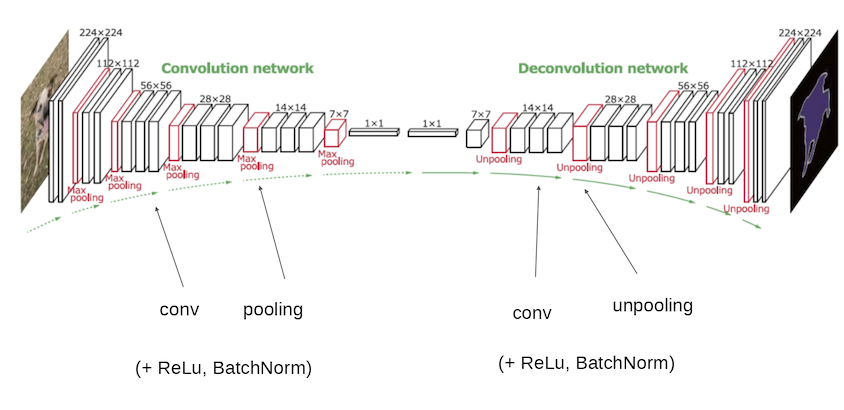

In [ ]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder. conv + pooling
        self.enc_conv0 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3), padding=1) # 256x256
        self.pool0 = nn.MaxPool2d(kernel_size=(2,2)) # 256 -> 128
        self.enc_conv1 = nn.Conv2d(in_channels=6, out_channels=9, kernel_size=(3,3), padding=1) # 128x128
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2)) # 128 -> 64
        self.enc_conv2 = nn.Conv2d(in_channels=9, out_channels=12, kernel_size=(3,3), padding=1) # 64x64
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2)) # 64 -> 32
        self.enc_conv3 = nn.Conv2d(in_channels=12, out_channels=15, kernel_size=(3,3), padding=1) # 32x32
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2)) # 32 -> 16

        # bottleneck (середина, самая узнкая часть сети)
        self.bottleneck_conv = nn.Conv2d(in_channels=15, out_channels=15, kernel_size=(3,3), padding=1) # 16x16

        # decoder. upsample + conv
        self.upsample0 = nn.Upsample(scale_factor=2, mode='bilinear') # 16 -> 32
        self.dec_conv0 = nn.Conv2d(in_channels=15, out_channels=12, kernel_size=(3,3), padding=1) # 32x32
        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear') # 32 -> 64
        self.dec_conv1 = nn.Conv2d(in_channels=12, out_channels=9, kernel_size=(3,3), padding=1) # 64x64
        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear') # 64 -> 128
        self.dec_conv2 = nn.Conv2d(in_channels=9, out_channels=6, kernel_size=(3,3), padding=1) # 128x128
        self.upsample3 = nn.Upsample(scale_factor=2, mode='bilinear') # 128 -> 256
        self.dec_conv3 = nn.Conv2d(in_channels=6, out_channels=1, kernel_size=(3,3), padding=1) # 256x256

    def forward(self, x):
        # encoder
        e0 = self.pool0(F.relu(self.enc_conv0(x)))
        e1 = self.pool1(F.relu(self.enc_conv1(e0)))
        e2 = self.pool2(F.relu(self.enc_conv2(e1)))
        e3 = self.pool3(F.relu(self.enc_conv3(e2)))

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = F.relu(self.dec_conv0(self.upsample0(b)))
        d1 = F.relu(self.dec_conv1(self.upsample1(d0)))
        d2 = F.relu(self.dec_conv2(self.upsample2(d1)))
        # сигмоидная функция активации, потому что у нас задача
        # бинарной сегментации
        # в случае многоклассовой сегментации был бы softmax
        d3 = F.sigmoid(self.dec_conv3(self.upsample3(d2)))
        return d3

In [ ]:
device = 'cpu' #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

'cpu'

In [ ]:
from IPython.display import clear_output

def train(model, opt, loss_fn, epochs, train_loader, val_loader):

    for epoch in range(epochs):
        # печатаем номер текущей эпохи
        print('* Epoch %d/%d' % (epoch+1, epochs))

        # 1. Обучаем сеть на картинках из train_loader
        model.train()  # train mode

        avg_train_loss = 0
        for i, (X_batch, Y_batch) in enumerate(train_loader):
            # переносим батч на GPU
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            # получаем ответы сети на батч
            Y_pred = model(X_batch)

            # считаем лосс, делаем шаг оптимизации сети
            loss = loss_fn(Y_pred, Y_batch)
            loss.backward()
            opt.step()
            opt.zero_grad()

            avg_train_loss += loss / len(train_loader)

        # выводим средний лосс на тренировочной выборке за эпоху
        print('avg train loss: %f' % avg_train_loss)

        # 2. Тестируем сеть на картинках из val_loader
        model.eval()

        avg_val_loss = 0
        for i, (X_batch, Y_batch) in enumerate(val_loader):
            # переносим батч на GPU
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            # получаем ответы сети на батч
            Y_pred = model(X_batch)
            # считаем лосс на батче
            loss = loss_fn(Y_pred, Y_batch)

            avg_val_loss += loss / len(val_loader)

        # выводим средний лосс на валидационных данных
        print('avg val loss: %f' % avg_val_loss)


        # 3. Визуализируем ответы сети на шести картинках из валидационных данных

        # получаем один батч из data_val
        X_val, Y_val = next(iter(val_loader))
        # получаем ответ сети на картинки из батча
        Y_pred = model(X_val.to(device))
        Y_pred = Y_pred.detach().cpu().numpy()

        # удаляем предыдущую визуализацию
        clear_output(wait=True)

        # визуализируем исходные картинки, верный ответ и ответ нашей модели
        _, axes = plt.subplots(3, 6, figsize=(6*4, 3*4))
        for k in range(6):
            # отрисовываем 6 картинок, поданных на вход сети
            # картинки нормализованы, поэтому могут выглядеть непривычно
            axes[0][k].imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray', aspect='auto')
            axes[0][k].title.set_text('Input')

            # отрисовываем правильные маски сегментации для шести картинок выше
            axes[1][k].imshow(Y_val[k].numpy()[0], cmap='gray', aspect='auto')
            axes[1][k].title.set_text('Real Map')

            # отрисовываем ответы сети для каждого из четырех классов сегментации в отдельности
            axes[2][k].imshow(Y_pred[k][0], cmap='gray', aspect='auto')
            axes[2][k].title.set_text('Output')
        plt.suptitle('%d / %d - val loss: %f' % (epoch+1, epochs, avg_val_loss))
        plt.show()

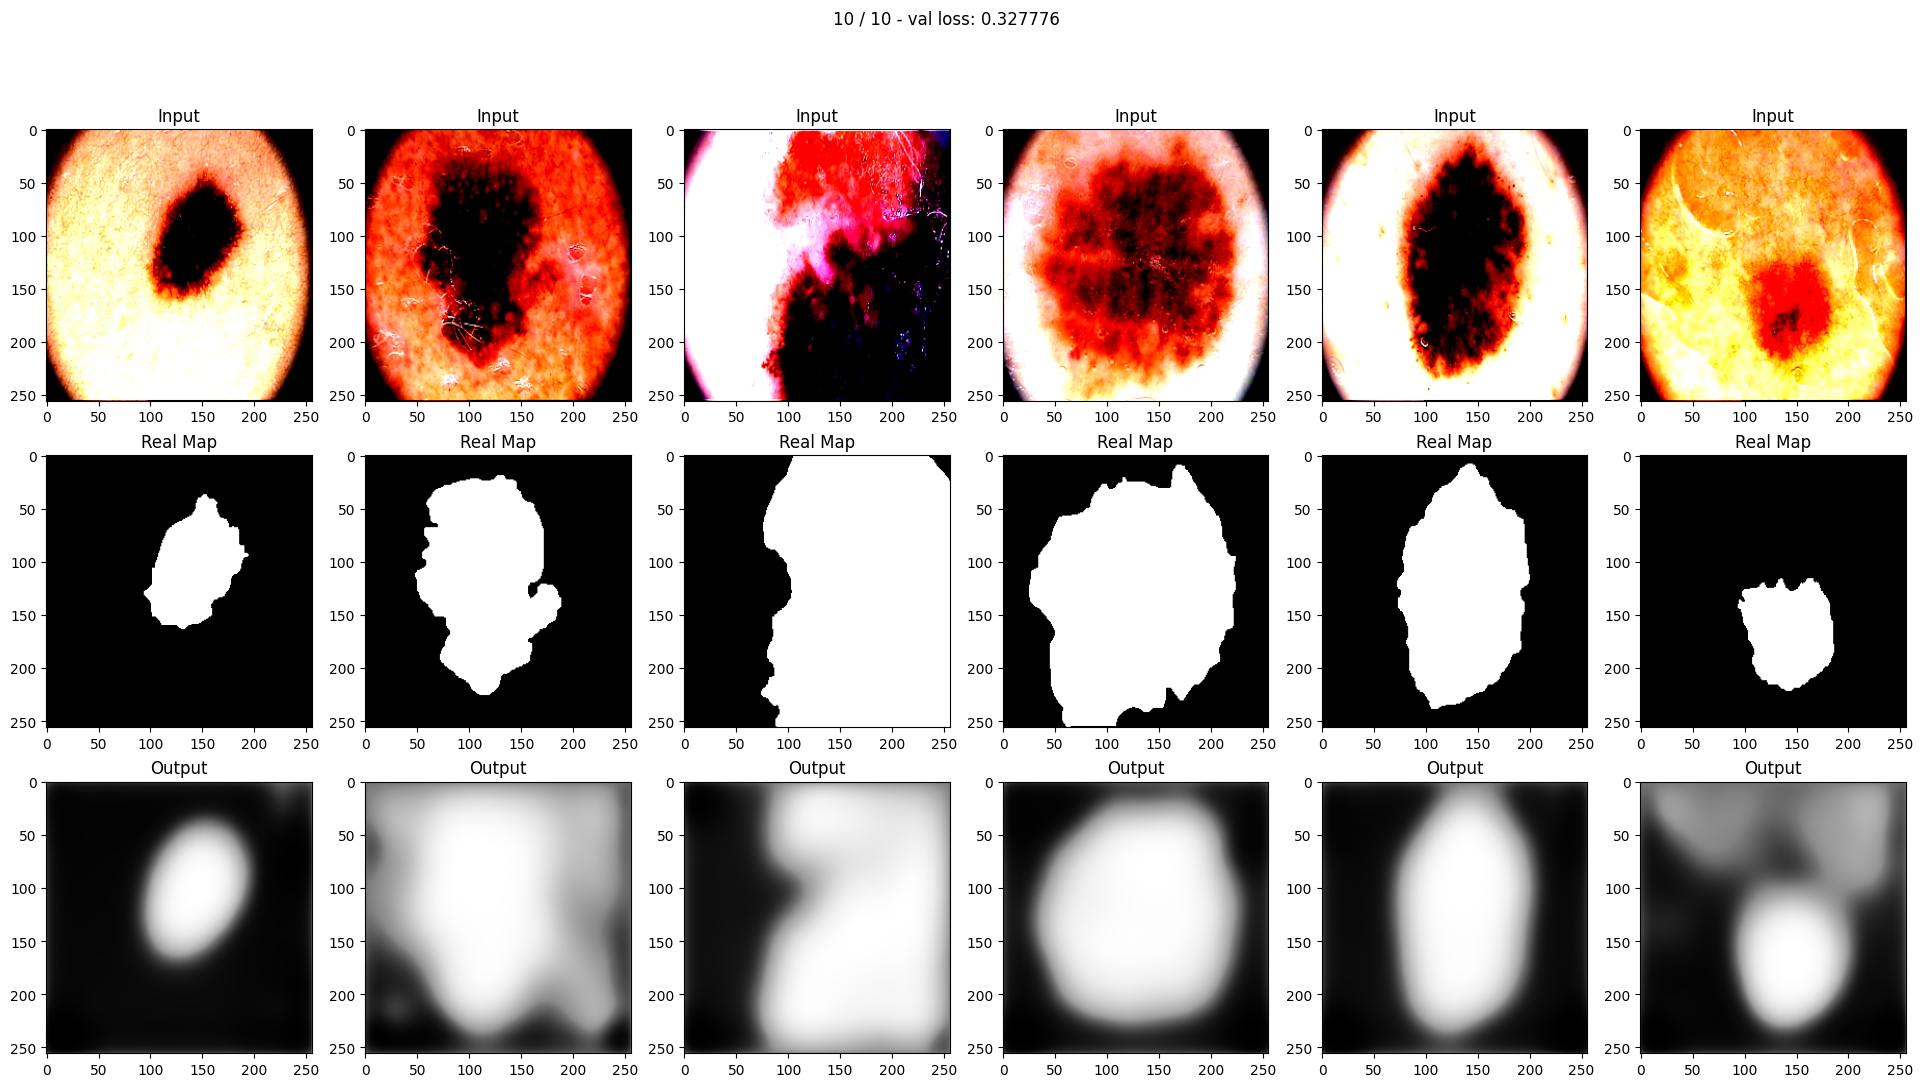

In [ ]:
#Определяем модель, функцию потерь, оптимизатор, и запускаем обучение сети
model = SegNet().to(device)
# бинарная кросс-энтропия
loss = nn.BCELoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, opt, loss, 10, train_loader, val_loader)

In [ ]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from torchmetrics import JaccardIndex

X_val, Y_val = next(iter(val_loader))
# получаем ответ сети на картинки из батча
Y_pred = model(X_val.to(device))

jaccard = JaccardIndex(task='binary').to(device)
jaccard(Y_pred, Y_val)

tensor(0.6478)

Посчитаем средние лосс и метрику на train, val и test частях датасета

In [ ]:
def evaluate(model, dataloader, loss_fn, metric_fn):

    losses = []
    metrics = []

    for i, batch in enumerate(dataloader):

        # получаем текущий батч
        X_batch, y_batch = batch
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        with torch.no_grad():
            # получаем выход модели
            logits = model(X_batch)

            # считаем лосс по батчу
            loss = loss_fn(logits, y_batch)
            losses.append(loss.item())

            # считаем метрику по батчу
            metric = metric_fn(logits, y_batch)
            metrics.append(metric.item())

    # возвращает средние значения лосса и метрики
    return np.mean(losses), np.mean(metrics)

In [ ]:
evaluate(model, train_loader, loss, jaccard)

(0.27911511276449474, 0.7024687017713275)

In [ ]:
evaluate(model, val_loader, loss, jaccard)

(0.3277757540345192, 0.621573343873024)

In [ ]:
evaluate(model, test_loader, loss, jaccard)

(0.27735820412635803, 0.6846791207790375)

# Детекция

#### R-CNN

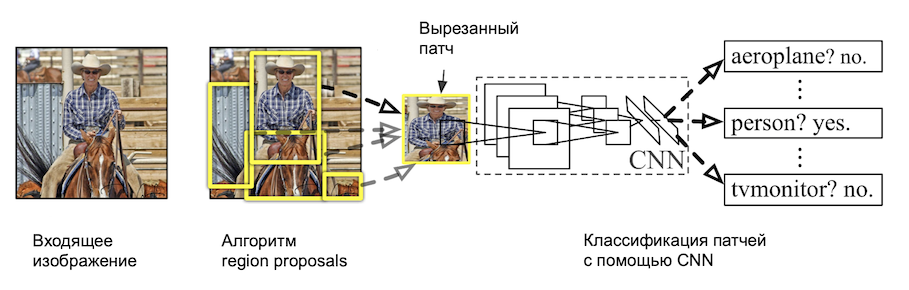

Идея устройства R-CNN такая:
1. На входящей картинке запустить алгоритм region proposals. Этот алгоритм выдает примерные положения bounding box'ов, где могли бы располагаться объекты. Алгоритм выдает примерно 2 тысячи претендентов на bounding box'ы;
2. Все части картинки внутри bounding box'ов, полученных на первом шаге, поадются на вход CNN для классификации.
4. Те bounding box'ы, в которых на втором шаге нашлись объекты, немного улучшаются с помощью эвристик.

**Region proposal algorithm**



На заре развития алгоритма R-CNN в качестве алгоритма region proposal предлагалось брать алгоритм сегментации (не основанный на нейросетях). Этот алгоритм выдавал иерархическую структуру сегментации картинки. Region proposals формировались с каждого уровня иерархии как box'ы, содержащие сегментированные объекты. Проиллюстрировать это можно примерно так:

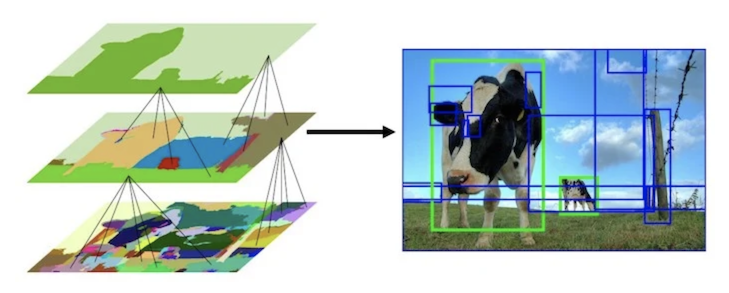

Этот алгоритм работал неплохо, но время его работы было довольно долгим. Поэтому на его основе были приудманы два улучшения: Fast R-CNN и Faster R-CNN. Подробнее про них можно узнать из лекций по детекции Deep Learning School (ссылки в разделе "дополнительно")

#### YOLO

Несмотря на все улучшения, алгоритмы детекции на основе идеи R-CNN все равно оказались довольно долгими. Долгое время работы получается в основном за счет того, что нужно много раз запускать сеть для классификации (один раз для каждого предполагаемого bounding box'а). Для real-time детекции они явно не подходили. Поэтому была придумана другая идея нейросети для детекции: **YOLO ("You Only Look Once")**. Нейросети на основе YOLO используются для real-time детекции и по сей день.

Главная фишка YOLO — она требует только одного прогона нейросети для детекции всех объектов на картинке.

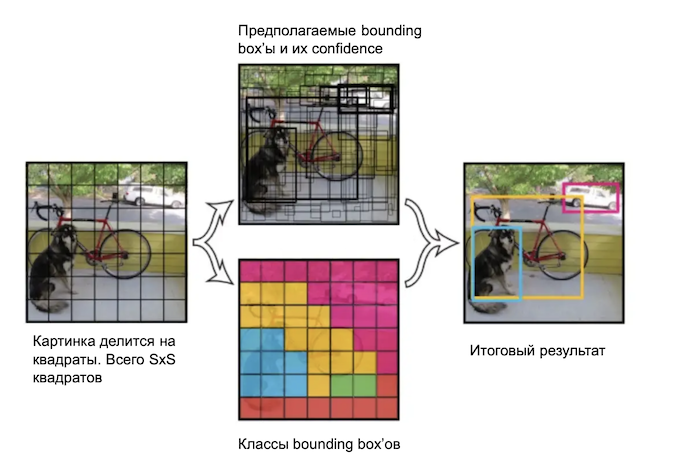

Идея работы YOLO:
1. Исходная картинка разбивается на пачти фиксированного размера. Всего SxS патчей;
2. Картинка подается на вход нейросети. Задача этой нейросети — для каждого из SxS патчей выдать b предполагаемых bounding box'ов. И для каждого bounding box'а выдать его координаты [x1, y1], [x2, y2] и confidence (уверенность) в том, что этот bounding box верный. Кроме этого, сеть для каждого патча должна выдать класс объекта, который находится в этом патче. Выходит, всего нейросеть выдает тензор размера SxSx(5b+c), где с — количество классов детекции.
3. Из всех SxSx5b bounding box'ов остаются только те, для которых confidence выше некоторого порога. Это и есть итоговый результат.

Этот алгоритм работает очень быстро, и пригоден для real-time детекции. По сей день исследователи продолжают придумывать идеи, как сделать YOLO еще быстрее.

Главный недостаток этого алгоритма — то, что он не может детектировать очень маленькие объекты. Для каждого патча в итоге остается только один bounding box. Если внутри одного патча помещались два или более объектов, детектирован может быть только один из них.

- Набор лекций по **детекции** в Deep Learning School:
    - [Повторение классификации](https://youtu.be/8D01Xo9hWgg);
    - [Основы детекции](https://youtu.be/Y4JvVOaZWsU);
    - [Двухстадийные нейросети](https://youtu.be/WrKl7GHWilA);
    - [Одностадийные нейросети](https://youtu.be/OPK63uqAQLs);
    - [Современные подходы и задачи](https://youtu.be/6WXUNNYysww).


- Набор лекций по **сегментации** в Deep Learning School:
    - [Введение](https://youtu.be/tIqndofykgc);
    - [Трюки и архитектуры нейросетей для сегментации](https://youtu.be/tIqndofykgc): transposed convolution, dilated convolution;
    - [U-Net](https://youtu.be/yEuIV5FsRMs).


- [Статья про устройство region proposals алгоритмов для детекции](https://learnopencv.com/selective-search-for-object-detection-cpp-python/) (на английском)
- [Статья про transposed convoliution](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)

# Autoencoders & GANs

#### Автоэнкодеры для удаления шумов с изображений

In [ ]:
import imutils
import cv2
import os
from imutils import paths
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
#! unzip -qq /content/brain_tumor_dataset.zip

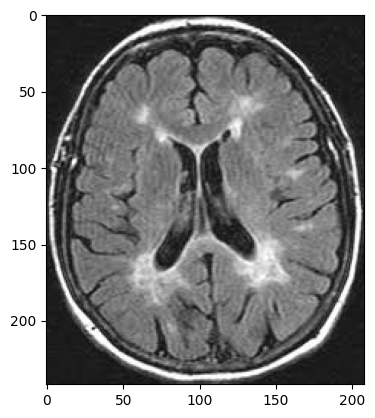

In [ ]:
image0=cv2.imread('/content/brain_tumor_dataset/no/23 no.jpg')
image1=cv2.imread('/content/brain_tumor_dataset/yes/Y10.jpg')
plt.imshow(image0)

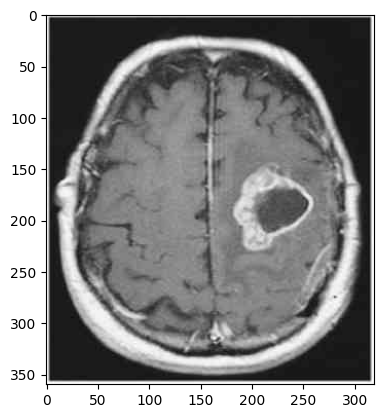

In [ ]:
plt.imshow(image1)

Сначала получим список содержимого из каталогов «no» и «yes» с помощью команды os.listdir(). Далее с помощью библиотеки OpenCV и команды cv2.imread() прочитаем наше изображение в трехмерный массив.

Во первых все изображения разного размера, а значит размер надо как‑то унифицировать, а во вторых необходимо матричные представления изображения перевести в вектор [0,1]. Приведем все изображения к размеру 256×256, а затем каждое значение пикселя разделим на 255.

In [ ]:
img_r = 256
folder_path = "/content/brain_tumor_dataset"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
for image_name in no_images:
    image = cv2.imread(folder_path + '/no/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((img_r, img_r))
    image2arr = np.array(image) / 255
    dataset.append(image2arr)

for image_name in yes_images:
    image = cv2.imread(folder_path + '/yes/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((img_r, img_r))
    image2arr = np.array(image) / 255
    dataset.append(image2arr)

In [ ]:
X_train, X_test = train_test_split(dataset, test_size= 0.25, random_state = 42)

Сначала с помощью библиотеки numpy смоделируем гауссов шум с нулевым математическим ожиданием и среднеквадратическим отклонением, равным единице, а затем добавим его к обучающему и тестовому набору с коэффициентом 0,4.

In [ ]:
noise = np.random.normal(loc=0, scale=1, size=(img_r,img_r,1))
x_train_noise = np.clip((np.array(X_train)+noise*0.4),0,1)
x_test_noise = np.clip((np.array(X_test)+noise*0.4),0,1)

Теперь можно приступать к архитектуре нейронной сети. Размер входного слоя равен размеру изображения (256, 256,3). В связи стем, что наши данные представляют собой изображения, тогда будем создавать автоэнкодер, состоящий из сверточных слоев. Как было сказано выше, нам необходимо создать две функции: энкодер и декодер. Энкодер будет состоять из двух сверточных слоев 256×3х3 и 128×3х3 соответственно и двух слоев с максимальным объединением 2×2.

In [ ]:
# input layer
input_layer = Input(shape=(img_r,img_r,3))
#encoder
encoded_layer1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_layer2)

Декодер по сути является полной противоположностью энкодера, так как мы восстанавливаем 2D представление наших изображений. Он будет состоять из двух сверточных слоев 128х3х3 и 256х3х3 соответственно и двух слоев с повышающей дискретизацией 2х2.

In [ ]:
decoded_layer1 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(256, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
output_layer   = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(decoded_layer2)

In [ ]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792 

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
history = model.fit(x_train_noise, X_train, epochs=10, validation_data=(x_test_noise, X_test), batch_size=10)

Epoch 1/10
19/19 [==============================] - 600s 31s/step - loss: 0.0626 - val_loss: 0.0289
Epoch 2/10
19/19 [==============================] - 564s 30s/step - loss: 0.0225 - val_loss: 0.0222
Epoch 3/10
19/19 [==============================] - 564s 30s/step - loss: 0.0154 - val_loss: 0.0125
Epoch 4/10
19/19 [==============================] - 518s 27s/step - loss: 0.0100 - val_loss: 0.0096
Epoch 5/10
19/19 [==============================] - 521s 28s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 6/10
19/19 [==============================] - 557s 30s/step - loss: 0.0074 - val_loss: 0.0089
Epoch 7/10
19/19 [==============================] - 522s 28s/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
19/19 [==============================] - 514s 27s/step - loss: 0.0065 - val_loss: 0.0066
Epoch 9/10
19/19 [==============================] - 523s 28s/step - loss: 0.0060 - val_loss: 0.0062
Epoch 10/10
19/19 [==============================] - 520s 27s/step - loss: 0.0059 - val_loss: 0.0059

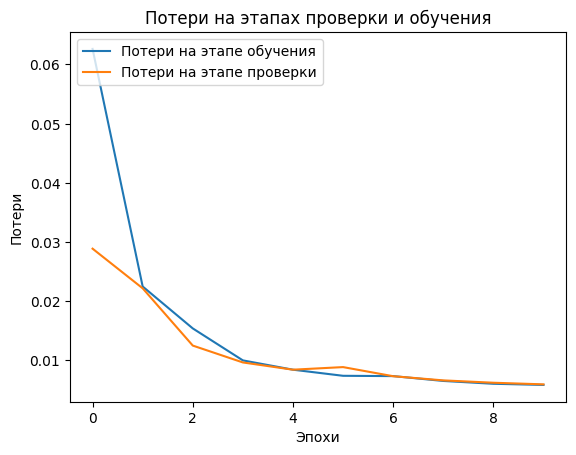

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери на этапах проверки и обучения')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Потери на этапе обучения', 'Потери на этапе проверки'], loc='upper left')
plt.show()

In [ ]:
decoded_imgs = model.predict(x_test_noise)

2/2 [==============================] - 43s 22s/step


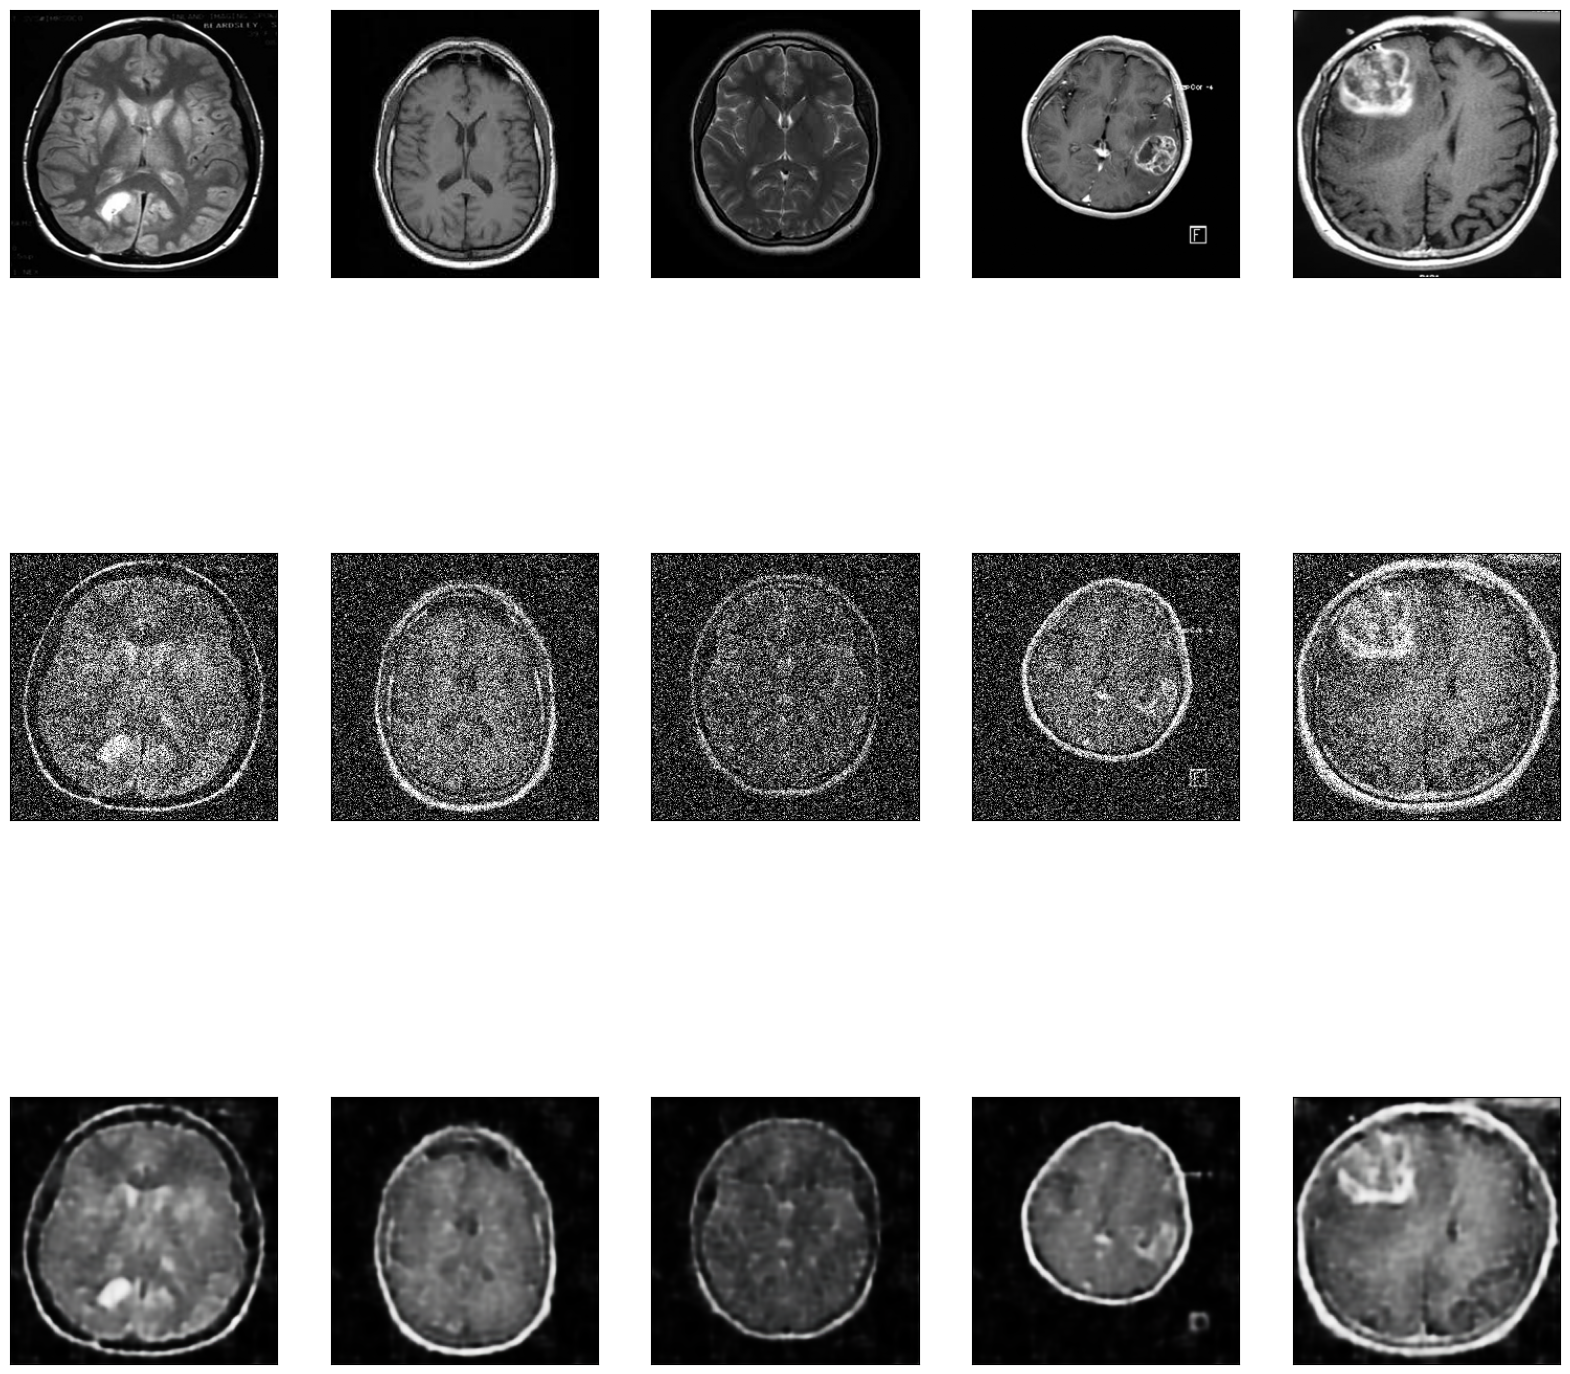

In [ ]:
n = 5
plt.figure(figsize=(20, 20))

for i in range(n):
	# оригинальные изображения
	ax = plt.subplot(3, n, i + 1)
	plt.imshow((X_test[i]))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)

  # зашумленные изображения
	ax = plt.subplot(3, n, i + 1 + n)
	plt.imshow(x_test_noise[i])
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)

	# восстановленные изображения автоэнкодером
	ax = plt.subplot(3, n, i + 1 + 2*n)
	plt.imshow(np.array(decoded_imgs[i]))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
lab_err = []
for i in range(5):
	pred = np.array(decoded_imgs[i])
	target = X_test[i]
	err = np.sqrt(np.mean((target-pred)**2))
	lab_err.append(err)
print("Image error:",lab_err,'\n')

Image error: [0.08147581391301578, 0.07015568307100895, 0.05955814586592686, 0.06792115552256636, 0.08852606850485639] 

